In [1]:
import sys
import os
import importlib

# Ajout du chemin une fois
sys.path.append(os.path.abspath('../python_files'))

# Liste des noms des modules à importer et recharger
module_names = [
    'preprocessing',
    'imports',
    'files',
    'clustering',
    'profile_prediction',
    'prediction_24h'
]

# Import et reload automatique
modules = {}
for name in module_names:
    modules[name] = importlib.import_module(name)
    importlib.reload(modules[name])

# Importer tout en global namespace (équivalent à from ... import *)
for name in module_names:
    exec(f'from {name} import *')


In [2]:
consommation_chauffage = extract_and_concat_consommation(Simulation_Dataset, column_index=4, prefix="consommation_heat_")


In [3]:

# Exemple d'utilisation
city_groups = {
    "Weather_Dataset": Weather_Dataset
   
    
}

prefix_column_map = {
    "Text_": 1,
    "Hum_": 3,
    "Wind_": 4,
    "Solar_": 5,
    "Ground_": 10
}

combined_data = extract_and_combine_all(city_groups, prefix_column_map)

city_groups = {
    "Simulation_Dataset":Simulation_Dataset  
}

prefix_column_map = {
    "Tint_": 2,   
}

combined_Tint = extract_and_combine_all(city_groups, prefix_column_map)


In [4]:
Text_combined = combined_data.get('Text_combined_Weather_Dataset')
Hum_combined = combined_data.get('Hum_combined_Weather_Dataset')
Wind_combined = combined_data.get('Wind_combined_Weather_Dataset')
Tint_combined = combined_Tint.get('Tint_combined_Simulation_Dataset')


In [5]:
start_date = "2018-01-01"
dates = pd.date_range(start=start_date, periods=len(consommation_chauffage), freq="D") 
consommation_chauffage.insert(0, "Date", dates)
Text_combined.insert(0, "Date", dates)
Hum_combined.insert(0, "Date", dates)

In [6]:
def add_heating_season(df, date_column='Date'):
    """
    Ajoute une colonne 'heat_on' qui vaut 1 si la date est entre le 1er novembre et le 30 avril, sinon 0.

    """ 
    # Extraire le mois et le jour
    month_day = df[date_column].dt.month * 100 + df[date_column].dt.day
    
    # Appliquer la condition: 1 si entre 1101 (1er nov) et 0430 (30 avril), sinon 0
    df['heat_on'] = ((month_day >= 1101) | (month_day <= 430)).astype(int)
    
    return df



In [7]:

add_heating_season(consommation_chauffage)
add_heating_season(Text_combined)
add_heating_season(Hum_combined)

,Date,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,heat_on
0,2018-01-01,82.0,81.0,80.5,83.0,84.5,84.0,85.0,85.0,81.0,...,58.0,72.0,79.0,83.5,83.0,84.0,86.0,86.5,86.5,1
1,2018-01-02,87.0,88.0,88.5,89.0,89.0,89.5,89.5,89.5,90.0,...,86.0,86.5,88.0,89.5,89.5,89.5,90.5,91.0,91.0,1
2,2018-01-03,91.0,90.0,88.0,84.5,80.5,78.0,76.0,76.0,78.0,...,69.5,69.0,71.0,73.5,75.0,75.5,75.5,80.0,85.0,1
3,2018-01-04,85.0,84.5,84.5,85.0,84.5,83.5,82.5,81.5,80.5,...,61.0,60.5,63.0,69.5,74.5,74.5,70.5,73.0,77.5,1
4,2018-01-05,76.5,76.0,77.0,79.5,81.5,83.0,84.5,84.5,84.5,...,55.5,60.0,68.0,75.0,79.0,82.5,86.5,91.0,94.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,2024-12-25,98.0,98.5,99.5,100.0,100.0,100.0,99.5,99.5,100.0,...,72.5,70.5,73.0,78.0,82.5,87.5,92.0,94.5,96.5,1
2551,2024-12-26,98.5,99.0,99.0,99.5,100.0,100.0,99.5,99.0,99.0,...,58.0,58.5,65.0,74.5,81.0,83.0,84.5,86.0,89.0,1
2552,2024-12-27,90.5,90.5,91.5,92.0,92.0,92.5,93.5,94.5,94.5,...,55.5,54.0,59.0,72.5,83.0,86.5,88.5,92.0,95.0,1
2553,2024-12-28,97.0,98.0,98.0,98.5,99.0,99.0,99.5,100.0,100.0,...,89.5,87.0,86.5,90.0,93.0,93.5,94.5,95.5,96.5,1


In [8]:
df_conso = consommation_chauffage[consommation_chauffage["heat_on"] == 1].copy()
df_Text = Text_combined[Text_combined["heat_on"] == 1].copy()
df_Hum = Hum_combined[Hum_combined["heat_on"] == 1].copy()



In [9]:
clustering_heat_toulouse = clustering(
    df=df_conso.drop(columns=["Date"]),  
    n_parts=1,                          
    status_column="heat_on",           
    n_clusters_list=[3]                
)



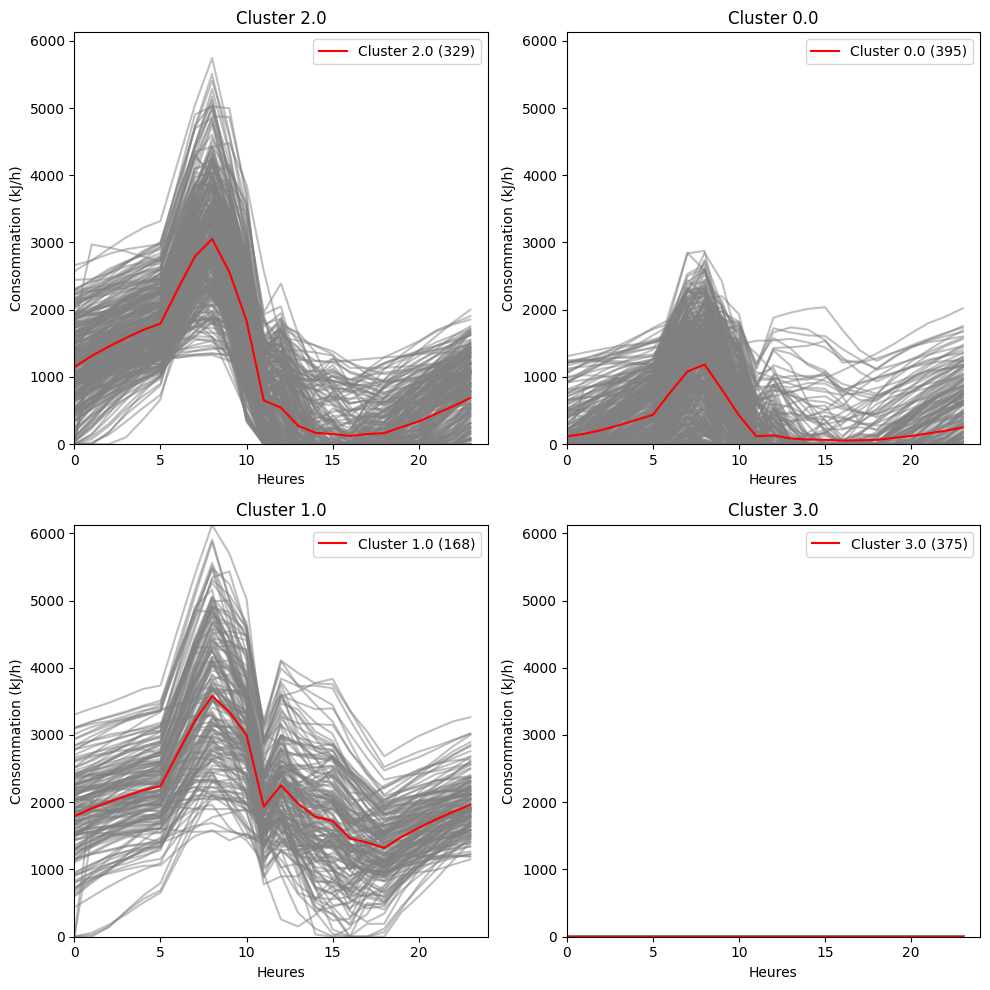

In [10]:
plot_clusters(clustering_heat_toulouse.drop(columns=["heat_on"]))

In [181]:
Text_combined

,Date,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,heat_on
0,2018-01-01,9.060,8.930,8.500,8.140,7.985,7.810,7.800,7.810,7.950,8.760,10.415,12.350,13.595,14.290,14.290,12.995,11.430,10.350,9.955,10.115,10.080,9.875,9.740,9.695,1
1,2018-01-02,9.500,9.200,8.975,8.840,8.770,8.620,8.660,8.930,9.170,9.260,9.500,10.340,11.485,12.410,12.905,13.140,13.225,13.055,12.945,13.215,13.515,13.560,13.555,13.675,1
2,2018-01-03,13.715,13.685,13.870,14.490,15.240,15.570,15.760,15.765,15.485,15.330,15.450,15.780,16.045,16.045,15.995,15.965,15.585,14.830,14.145,13.705,13.270,12.950,12.925,13.190,1
3,2018-01-04,13.885,14.855,15.375,15.390,15.465,15.500,15.530,15.540,15.495,15.550,15.670,16.095,16.830,17.575,17.960,17.720,17.085,15.990,14.390,13.095,12.725,13.040,12.810,12.335,1
4,2018-01-05,12.245,12.035,11.640,11.025,10.375,9.815,9.370,9.015,8.880,9.885,11.990,14.050,15.505,16.080,15.950,15.425,14.475,13.225,12.145,11.430,10.940,10.560,10.225,9.995,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,2024-12-25,6.590,6.480,6.280,6.235,6.215,6.090,5.925,5.740,5.530,5.370,5.360,5.505,6.120,7.320,8.645,9.515,9.775,9.115,7.860,6.700,5.365,4.310,4.000,3.610,1
2551,2024-12-26,3.025,2.570,2.105,1.640,1.165,0.835,0.600,0.355,0.255,0.015,0.895,3.440,6.090,8.420,10.260,11.510,11.910,10.490,7.680,5.625,4.505,3.650,2.930,1.945,1
2552,2024-12-27,1.180,0.855,0.530,0.130,-0.230,-0.565,-0.910,-1.245,-1.405,-1.105,0.330,3.060,6.205,9.055,11.305,12.715,12.940,11.280,7.770,4.745,3.640,3.045,2.060,1.485,1
2553,2024-12-28,1.145,0.350,-0.360,-0.480,-0.235,-0.165,-0.150,-0.035,0.020,0.145,0.630,1.670,3.030,4.355,5.275,5.725,5.830,5.495,4.510,3.485,2.990,2.635,2.220,1.900,1


In [11]:
Text_conso_heat_tou=pd.concat([df_Text,clustering_heat_toulouse["clusters_1"]],axis=1)

In [14]:
Text_conso_heat_tou=Text_conso_heat_tou.drop(columns=["Date"])

In [15]:
Text_conso_heat_tou

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,heat_on,clusters_1
0,9.060,8.930,8.500,8.140,7.985,7.810,7.800,7.810,7.950,8.760,...,11.430,10.350,9.955,10.115,10.080,9.875,9.740,9.695,1,2.0
1,9.500,9.200,8.975,8.840,8.770,8.620,8.660,8.930,9.170,9.260,...,13.225,13.055,12.945,13.215,13.515,13.560,13.555,13.675,1,2.0
2,13.715,13.685,13.870,14.490,15.240,15.570,15.760,15.765,15.485,15.330,...,15.585,14.830,14.145,13.705,13.270,12.950,12.925,13.190,1,0.0
3,13.885,14.855,15.375,15.390,15.465,15.500,15.530,15.540,15.495,15.550,...,17.085,15.990,14.390,13.095,12.725,13.040,12.810,12.335,1,0.0
4,12.245,12.035,11.640,11.025,10.375,9.815,9.370,9.015,8.880,9.885,...,14.475,13.225,12.145,11.430,10.940,10.560,10.225,9.995,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,6.590,6.480,6.280,6.235,6.215,6.090,5.925,5.740,5.530,5.370,...,9.775,9.115,7.860,6.700,5.365,4.310,4.000,3.610,1,2.0
2551,3.025,2.570,2.105,1.640,1.165,0.835,0.600,0.355,0.255,0.015,...,11.910,10.490,7.680,5.625,4.505,3.650,2.930,1.945,1,2.0
2552,1.180,0.855,0.530,0.130,-0.230,-0.565,-0.910,-1.245,-1.405,-1.105,...,12.940,11.280,7.770,4.745,3.640,3.045,2.060,1.485,1,2.0
2553,1.145,0.350,-0.360,-0.480,-0.235,-0.165,-0.150,-0.035,0.020,0.145,...,5.830,5.495,4.510,3.485,2.990,2.635,2.220,1.900,1,0.0


In [16]:
X = Text_conso_heat_tou.iloc[:, :-1].values  # shape: (n_samples, 24)
y = Text_conso_heat_tou.iloc[:, -1].values 

In [18]:
X_lstm = X.reshape((X.shape[0], 25, 1))
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y, test_size=0.2, random_state=42,shuffle=False)



In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

num_classes = len(np.unique(y))

model = Sequential()
model.add(LSTM(64, input_shape=(25, 1))) 
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.3724 - loss: 1.3022 - val_accuracy: 0.3922 - val_loss: 1.1151
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4842 - loss: 1.1089 - val_accuracy: 0.5980 - val_loss: 0.9094
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5211 - loss: 0.9957 - val_accuracy: 0.5980 - val_loss: 0.8558
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5472 - loss: 0.9713 - val_accuracy: 0.5490 - val_loss: 0.8904
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5609 - loss: 0.9643 - val_accuracy: 0.5882 - val_loss: 0.8966
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5385 - loss: 0.9627 - val_accuracy: 0.5980 - val_loss: 0.8165
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5558 - loss: 0.9507 - val_accuracy: 0.5686 - val_loss: 0.8367
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5492 - loss: 0.9213 - val_accuracy: 0.6078 - val_loss: 0.

In [34]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

# Prédictions probabilistes
y_pred_probs = model.predict(X_test)

# Classes prédites
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Accuracy
acc = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {acc:.4f}")

# F1-score macro
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print(f"F1 Score: {f1:.4f}")




8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
Accuracy: 0.5669
F1 Score: 0.5676


In [233]:
Text_conso_heat_tou=pd.concat([df_Text,clustering_heat_toulouse.drop(columns=["heat_on"])],axis=1)

In [235]:
Text_combined['clusters'] = 4

# Assigner les valeurs de clustering_heat_toulouse uniquement pour les indices correspondants
valid_indices = Text_combined.index.intersection(clustering_heat_toulouse.index)
Text_combined.loc[valid_indices, 'clusters'] = clustering_heat_toulouse.loc[valid_indices, 'clusters_1'].values

In [236]:
Text_conso_heat_tou.loc[Test_Text_heat_toulouse.index, "clusters_1"] = \
    Test_Text_heat_toulouse["y_pred_Gradient Boosting_clusters_1"]

In [237]:
Text_conso_heat_tou

,Date,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,heat_on,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,clusters_1
0,2018-01-01,9.060,8.930,8.500,8.140,7.985,7.810,7.800,7.810,7.950,8.760,10.415,12.350,13.595,14.290,14.290,12.995,11.430,10.350,9.955,10.115,10.080,9.875,9.740,9.695,1,0.000000,1191.035222,1312.758731,1419.587492,1513.174730,1578.453365,1964.393414,2340.466249,2674.424141,1974.679566,764.431616,0.000000,0.000000,0.000000,0.000000,0.000000,46.882802,0.000000,12.597284,165.032178,309.615664,454.360768,581.485442,692.696269,1.0
1,2018-01-02,9.500,9.200,8.975,8.840,8.770,8.620,8.660,8.930,9.170,9.260,9.500,10.340,11.485,12.410,12.905,13.140,13.225,13.055,12.945,13.215,13.515,13.560,13.555,13.675,1,810.107258,932.496397,1038.400298,1125.989678,1203.801168,1262.344356,1615.840151,1906.159536,2163.834353,2141.193211,2045.397519,1392.473496,1642.885784,1425.817471,1235.423295,1216.862847,1081.300624,1000.744376,927.574038,938.912098,939.342954,961.082691,984.154059,990.419856,1.0
2,2018-01-03,13.715,13.685,13.870,14.490,15.240,15.570,15.760,15.765,15.485,15.330,15.450,15.780,16.045,16.045,15.995,15.965,15.585,14.830,14.145,13.705,13.270,12.950,12.925,13.190,1,1003.897458,1022.899320,1018.746767,970.512303,901.581261,847.178108,864.854141,891.012656,970.925253,970.136841,727.212779,200.974158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.356592,200.292594,324.326513,405.764384,454.396293,2.0
3,2018-01-04,13.885,14.855,15.375,15.390,15.465,15.500,15.530,15.540,15.495,15.550,15.670,16.095,16.830,17.575,17.960,17.720,17.085,15.990,14.390,13.095,12.725,13.040,12.810,12.335,1,451.649622,406.502586,397.278571,433.969041,460.460104,465.801117,535.085130,594.731588,656.292158,455.754993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
4,2018-01-05,12.245,12.035,11.640,11.025,10.375,9.815,9.370,9.015,8.880,9.885,11.990,14.050,15.505,16.080,15.950,15.425,14.475,13.225,12.145,11.430,10.940,10.560,10.225,9.995,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,151.197296,592.619330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,2024-12-25,6.590,6.480,6.280,6.235,6.215,6.090,5.925,5.740,5.530,5.370,5.360,5.505,6.120,7.320,8.645,9.515,9.775,9.115,7.860,6.700,5.365,4.310,4.000,3.610,1,1605.074900,1673.802791,1749.746059,1814.140401,1884.247242,1932.504941,2389.442901,2854.274773,3334.017349,3393.166644,2897.446845,1401.762495,1387.391695,421.342997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.229098,139.156888,406.034844,0.0
2551,2024-12-26,3.025,2.570,2.105,1.640,1.165,0.835,0.600,0.355,0.255,0.015,0.895,3.440,6.090,8.420,10.260,11.510,11.910,10.490,7.680,5.625,4.505,3.650,2.930,1.945,1,660.441056,897.777933,1125.002529,1360.252001,1596.879163,1773.812846,2531.772790,3289.754074,4023.299986,4152.826945,3184.481888,849.984835,345.230401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
2552,2024-12-27,1.180,0.855,0.530,0.130,-0.230,-0.565,-0.910,-1.245,-1.405,-1.105,0.330,3.060,6.205,9.055,11.305,12.715,12.940,11.280,7.770,4.745,3.640,3.045,2.060,1.485,1,99.357387,360.536351,651.431965,922.717024,1171.258973,1403.311155,2253.423156,3123.909377,3295.018004,3352.155612,2251.612451,415.063058,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
2553,2024-12-28,1.145,0.350,-0.360,-0.480,-0.235,-0.165,-0.150,-0.035,0.020,0.145,0.630,1.670,3.030,4.355,5.275,5.725,5.830,5.495,4.510,3.485,2.990,2.635,2.220,1.900,1,0.000000,72.204610,312.528293,570.636102,746.392481,942

In [238]:
Text_conso_j_1=pd.concat([Text_combined,consommation_chauffage.drop(columns=["Date","heat_on"])],axis=1)


In [239]:

Text_conso_heat_tou = Text_conso_heat_tou.sort_values('Date')
Text_conso_j_1 = Text_conso_j_1.sort_values('Date')

# Créer une liste pour stocker les lignes combinées
combined_rows = []

# Parcourir chaque ligne de Text_conso_heat_tou
for index, row in Text_conso_heat_tou.iterrows():
    jour_precedent = row['Date'] - pd.Timedelta(days=1)  # Trouver jour j-1
    
    # Vérifier si j-1 existe dans Text_combined
    prev_row = Text_conso_j_1[Text_conso_j_1['Date'] == jour_precedent]
    
    if not prev_row.empty:
        prev_row = prev_row.iloc[0]  # Sélectionner uniquement la première correspondance
        
        # Ajouter un suffixe "_j-1" aux colonnes du jour précédent
        #prev_row = prev_row.rename(lambda x: f"{x}_j-1")

        # Fusionner proprement les deux lignes
        combined_row = pd.concat([prev_row.to_frame().T.reset_index(drop=True), 
                                  row.to_frame().T.reset_index(drop=True)], axis=1)
        
        combined_rows.append(combined_row)  # Ajouter la ligne fusionnée
    else:
        # Si aucune correspondance, passer à la ligne suivante sans l'ajouter
        continue

# Convertir la liste en DataFrame final
Text_final = pd.concat(combined_rows, ignore_index=True)

Text_final2 = Text_final.drop(columns=[col for col in Text_final.columns if "Date" in str(col).lower()], errors='ignore')



In [240]:
Text_final2

,Date,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,heat_on,clusters,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Date,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,heat_on,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,clusters_1
0,2018-01-01 00:00:00,9.06,8.93,8.5,8.14,7.985,7.81,7.8,7.81,7.95,8.76,10.415,12.35,13.595,14.29,14.29,12.995,11.43,10.35,9.955,10.115,10.08,9.875,9.74,9.695,1,1,0.0,1191.035222,1312.758731,1419.587492,1513.17473,1578.453365,1964.393414,2340.466249,2674.424141,1974.679566,764.431616,0.0,0.0,0.0,0.0,0.0,46.882802,0.0,12.597284,165.032178,309.615664,454.360768,581.485442,692.696269,2018-01-02 00:00:00,9.5,9.2,8.975,8.84,8.77,8.62,8.66,8.93,9.17,9.26,9.5,10.34,11.485,12.41,12.905,13.14,13.225,13.055,12.945,13.215,13.515,13.56,13.555,13.675,1,810.107258,932.496397,1038.400298,1125.989678,1203.801168,1262.344356,1615.840151,1906.159536,2163.834353,2141.193211,2045.397519,1392.473496,1642.885784,1425.817471,1235.423295,1216.862847,1081.300624,1000.744376,927.574038,938.912098,939.342954,961.082691,984.154059,990.419856,1.0
1,2018-01-02 00:00:00,9.5,9.2,8.975,8.84,8.77,8.62,8.66,8.93,9.17,9.26,9.5,10.34,11.485,12.41,12.905,13.14,13.225,13.055,12.945,13.215,13.515,13.56,13.555,13.675,1,1,810.107258,932.496397,1038.400298,1125.989678,1203.801168,1262.344356,1615.840151,1906.159536,2163.834353,2141.193211,2045.397519,1392.473496,1642.885784,1425.817471,1235.423295,1216.862847,1081.300624,1000.744376,927.574038,938.912098,939.342954,961.082691,984.154059,990.419856,2018-01-03 00:00:00,13.715,13.685,13.87,14.49,15.24,15.57,15.76,15.765,15.485,15.33,15.45,15.78,16.045,16.045,15.995,15.965,15.585,14.83,14.145,13.705,13.27,12.95,12.925,13.19,1,1003.897458,1022.89932,1018.746767,970.512303,901.581261,847.178108,864.854141,891.012656,970.925253,970.136841,727.212779,200.974158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.356592,200.292594,324.326513,405.764384,454.396293,2.0
2,2018-01-03 00:00:00,13.715,13.685,13.87,14.49,15.24,15.57,15.76,15.765,15.485,15.33,15.45,15.78,16.045,16.045,15.995,15.965,15.585,14.83,14.145,13.705,13.27,12.95,12.925,13.19,1,2,1003.897458,1022.89932,1018.746767,970.512303,901.581261,847.178108,864.854141,891.012656,970.925253,970.136841,727.212779,200.974158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.356592,200.292594,324.326513,405.764384,454.396293,2018-01-04 00:00:00,13.885,14.855,15.375,15.39,15.465,15.5,15.53,15.54,15.495,15.55,15.67,16.095,16.83,17.575,17.96,17.72,17.085,15.99,14.39,13.095,12.725,13.04,12.81,12.335,1,451.649622,406.502586,397.278571,433.969041,460.460104,465.801117,535.08513,594.731588,656.292158,455.754993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2018-01-04 00:00:00,13.885,14.855,15.375,15.39,15.465,15.5,15.53,15.54,15.495,15.55,15.67,16.095,16.83,17.575,17.96,17.72,17.085,15.99,14.39,13.095,12.725,13.04,12.81,12.335,1,2,451.649622,406.502586,397.278571,433.969041,460.460104,465.801117,535.08513,594.731588,656.292158,455.754993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-05 00:00:00,12.245,12.035,11.64,11.025,10.375,9.815,9.37,9.015,8.88,9.885,11.99,14.05,15.505,16.08,15.95,15.425,14.475,13.225,12.145,11.43,10.94,10.56,10.225,9.995,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.197296,592.61933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,2018-01-05 00:00:00,12.245,12.035,11.64,11.025,10.375,9.815,9.37,9.015,8.88,9.885,11.99,14.05,15.505,16.08,15.95,15.425,14.475,13.225,12.145,11.43,10.94,10.56,10.225,9.995,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.197296,592.61933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-06 00:00:00,9.815,9.505,9.265,9.1,8.87,8.605,8.365,8.175,7.94,7.59,7.325,7.19,7.225,7.4,7.585,7.825,8.05,8.205,8.305,8.28,8.085,7.9,8.16,8.895,1,0.0,0.0,0.0,0.0,0.0,0.0,187.430889,527.803388,708.210542,894.200212,1037.40593,801.974655,884.560089,934.234911,989.635974,1023.288454,802.334674,893.639847,979.936063,1064.245187,1144.028511,1200.659287,1239.047072,1

In [241]:
# Ajouter un suffixe automatique pour rendre les noms de colonnes uniques
def make_unique_columns(columns):
    seen = {}
    unique_cols = []
    for col in columns:
        if col not in seen:
            seen[col] = 1
            unique_cols.append(col)
        else:
            seen[col] += 1
            unique_cols.append(f"{col}_{seen[col]}")
    return unique_cols

Text_final2.columns = make_unique_columns(Text_final2.columns)

cols = Text_final2.columns.tolist()

first_part = cols[:-25]              
twentyfour_last_cols = cols[-25:-1]  
two_before_last = cols[-1:]      
new_cols = first_part + two_before_last + twentyfour_last_cols

Text_final_reordered = Text_final2[new_cols]

In [242]:
Text_final_reordered.head(1)

,Date,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,heat_on,clusters,0_2,1_2,2_2,3_2,4_2,5_2,6_2,7_2,8_2,9_2,10_2,11_2,12_2,13_2,14_2,15_2,16_2,17_2,18_2,19_2,20_2,21_2,22_2,23_2,Date_2,0_3,1_3,2_3,3_3,4_3,5_3,6_3,7_3,8_3,9_3,10_3,11_3,12_3,13_3,14_3,15_3,16_3,17_3,18_3,19_3,20_3,21_3,22_3,23_3,heat_on_2,clusters_1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,2018-01-01 00:00:00,9.06,8.93,8.5,8.14,7.985,7.81,7.8,7.81,7.95,8.76,10.415,12.35,13.595,14.29,14.29,12.995,11.43,10.35,9.955,10.115,10.08,9.875,9.74,9.695,1,1,0.0,1191.035222,1312.758731,1419.587492,1513.17473,1578.453365,1964.393414,2340.466249,2674.424141,1974.679566,764.431616,0.0,0.0,0.0,0.0,0.0,46.882802,0.0,12.597284,165.032178,309.615664,454.360768,581.485442,692.696269,2018-01-02 00:00:00,9.5,9.2,8.975,8.84,8.77,8.62,8.66,8.93,9.17,9.26,9.5,10.34,11.485,12.41,12.905,13.14,13.225,13.055,12.945,13.215,13.515,13.56,13.555,13.675,1,1.0,810.107258,932.496397,1038.400298,1125.989678,1203.801168,1262.344356,1615.840151,1906.159536,2163.834353,2141.193211,2045.397519,1392.473496,1642.885784,1425.817471,1235.423295,1216.862847,1081.300624,1000.744376,927.574038,938.912098,939.342954,961.082691,984.154059,990.419856


In [243]:
Text_final_reordered.columns = Text_final_reordered.columns.astype(str)

Text_final_reordered = Text_final_reordered.drop(
    columns=[col for col in Text_final_reordered.columns if col.startswith("Dat")]
)


In [249]:
from sklearn.preprocessing import MinMaxScaler
y2= Text_final_reordered.iloc[:, -24:].values 
X2 = Text_final_reordered.iloc[:, :-24].values 

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X2 = scaler_X.fit_transform(X2)
y2 = scaler_y.fit_transform(y2)


split_index = int((X2.shape[0] * 8) / 10)
X2 = X2.reshape(X2.shape[0], 1, X2.shape[1])

X_train2 = X2[:split_index, :]
X_test2 = X2[split_index:, :]
y_train2 = y2[:split_index, :]
y_test2 = y2[split_index:, :]



# Vérification des dimensions
print("Shape de X_train2 :", X_train2.shape)
print("Shape de X_test2 :", X_test2.shape)
print("Shape de y_train2 :", y_train2.shape)
print("Shape de y_test2 :", y_test2.shape)

Shape de X_train2 : (1012, 1, 76)
Shape de X_test2 : (254, 1, 76)
Shape de y_train2 : (1012, 24)
Shape de y_test2 : (254, 24)


In [250]:

def train_and_evaluate(model, X_train, y_train, X_test, y_test, scaler_temp, scaler_cons):
    # Compilation du modèle avec optimizer, loss et métriques
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    # Callback early stopping pour éviter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    # Séparation d'un ensemble validation à partir des données d'entraînement (sans shuffle)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)
    # Entraînement du modèle avec validation et early stopping
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
    
    # Affichage de la courbe de loss durant l'entraînement
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss during training')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
   
    # Évaluation du modèle sur l'ensemble validation
    loss, mae, mse = model.evaluate(X_val, y_val)
    rmse = np.sqrt(mse) 
    print(f"Validation Loss : {loss}")
    print(f"Validation MAE: {mae}")
    print(f"Validation MSE: {mse}")
    print(f"Validation RMSE: {rmse}")
    
    # Prédiction sur l'ensemble test
    predictions = model.predict(X_test) 
    y_test_reshape = y_test.reshape(-1, 24) 
    # Inverse transformation de la normalisation de la consommation
    predictions_norm = scaler_cons.inverse_transform(predictions)
    y_test_reshape_norm = scaler_cons.inverse_transform(y_test_reshape)

    # Calcul des métriques sur l'ensemble test
    mae_test = mean_absolute_error(y_test_reshape_norm, predictions_norm)
    mse_test = mean_squared_error(y_test_reshape_norm, predictions_norm)
    rmse_test = np.sqrt(mse_test)
    r2 = r2_score(y_test_reshape_norm, predictions_norm)
    cvrmse = rmse_test / np.mean(y_test_reshape_norm)

    print(f"Test MAE: {mae_test}")
    print(f"Test MSE: {mse_test}")
    print(f"Test RMSE: {rmse_test}")
    print(f"Test R²: {r2}")
    print(f"Test CVRMSE: {cvrmse}")

    return history, loss, mae, mse, rmse, mae_test, mse_test, rmse_test, r2, cvrmse, predictions



def model_lstm(X_train2, y_train2, X_test2, y_test2, scaler_temp, scaler_cons):
    # Définition du modèle LSTM séquentiel
    model2 = Sequential()
    # Couche LSTM avec 68 unités, activation tanh, forme d'entrée adaptée
    model2.add(LSTM(68, activation='tanh', input_shape=(X_train2.shape[1], X_train2.shape[2])))  
    # Couche Dropout pour régularisation
    model2.add(Dropout(0.2))
    # Couche Dense finale avec 24 sorties et activation linéaire (prédiction continue)
    model2.add(Dense(24, activation='linear'))   
    
    # Entraînement et évaluation du modèle
    history2, loss2, mae2, mse2, rmse2, mae_test2, mse_test2, rmse_test2, r2, cvrmse, predictions2 = train_and_evaluate(
        model2, X_train2, y_train2, X_test2, y_test2, scaler_temp, scaler_cons
    )
    
    return model2, history2, loss2, mae2, mse2, rmse2, mae_test2, mse_test2, rmse_test2, r2, cvrmse, predictions2


Epoch 1/100


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0629 - mae: 0.1793 - mse: 0.0629 - val_loss: 0.0382 - val_mae: 0.1427 - val_mse: 0.0382
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0297 - mae: 0.1277 - mse: 0.0297 - val_loss: 0.0189 - val_mae: 0.0883 - val_mse: 0.0189
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0197 - mae: 0.0964 - mse: 0.0197 - val_loss: 0.0171 - val_mae: 0.0876 - val_mse: 0.0171
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0186 - mae: 0.0950 - mse: 0.0186 - val_loss: 0.0167 - val_mae: 0.0843 - val_mse: 0.0167
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0167 - mae: 0.0905 - mse: 0.0167 - val_loss: 0.0157 - val_mae: 0.0809 - val_mse: 0.0157
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0154 - mae: 0.0856 - mse: 0.0154 - val_loss: 0.0149 - val_mae: 0.0848 - val_mse: 0.0149
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0142 - mae: 0.0856 - mse: 0.0142 - val_loss: 0.0137 - v

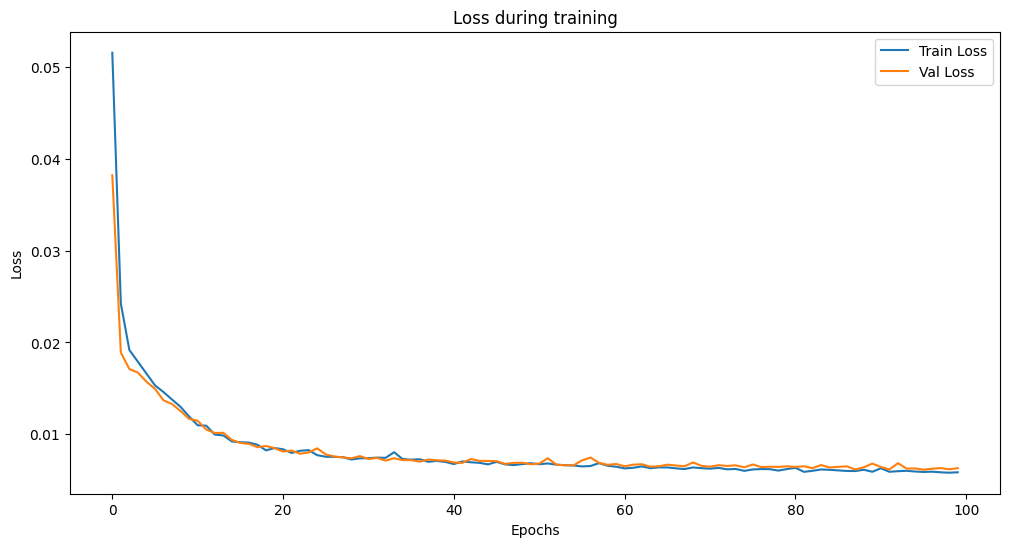

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0082 - mae: 0.0571 - mse: 0.0082
Validation Loss : 0.006120234727859497
Validation MAE: 0.04815327748656273
Validation MSE: 0.006120234727859497
Validation RMSE: 0.07823192908179816
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Test MAE: 272.0498205196798
Test MSE: 193818.65987487335
Test RMSE: 440.2484070100349
Test R²: 0.5928000018955731
Test CVRMSE: 0.7089305226272816


In [251]:
model2, history2, loss2, mae2, mse2, rmse2, mae_test2, mse_test2, rmse_test2, r2, cvrmse, predictions2 = model_lstm(
    X_train2, 
    y_train2, 
    X_test2, 
    y_test2, 
    scaler_X, 
    scaler_y
)
  

In [252]:
plot_true_vs_predicted_interactive(indices=[15, 11, 13,32,89], y_test=y_test2, predictions=predictions2, scaler_cons=scaler_y)
